In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
#load the data
df=pd.read_csv("C:/Users/Dell/Desktop/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#count the number of rows and columns in a dataset
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#get the count of number of survivers(0-indicates not survived, 1-indicates survived)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

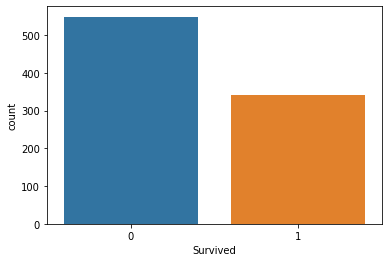

In [6]:
#visualize the count of survivers
sns.countplot(df['Survived'])

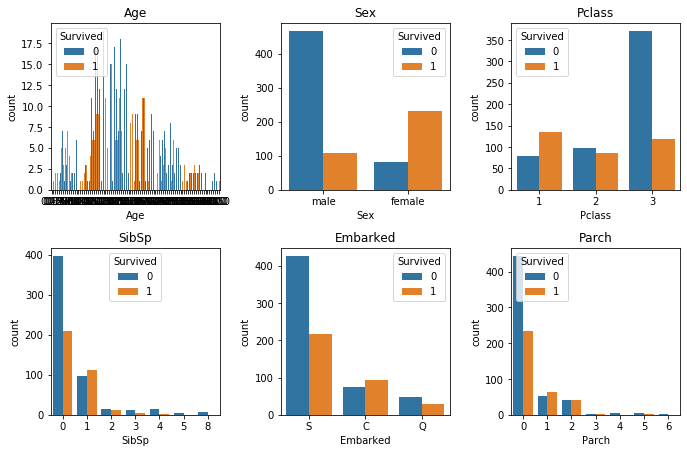

In [7]:
#visualize the count of survivors of columns 'sex','pclass','sibsp','embarked','parch'
cols=['Age','Sex','Pclass','SibSp','Embarked','Parch']
n_rows=2
n_cols=3
#the subplot grid and figure size of each graph
fig, axs=plt.subplots(n_rows, n_cols, figsize=(n_cols *3.2, n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols + c # index to go through the number of columns
        ax=axs[r][c] #show where to position each subplot
        sns.countplot(df[cols[i]],hue=df['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived', loc='Upper right')
plt.tight_layout()
        

In [8]:
#Look at the survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
#Look at survival rate by sex and class
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


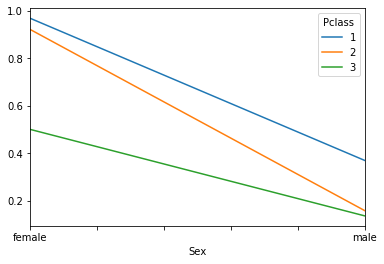

In [10]:
#Visually Look at survival rate by sex and class
df.pivot_table('Survived', index='Sex', columns='Pclass').plot()

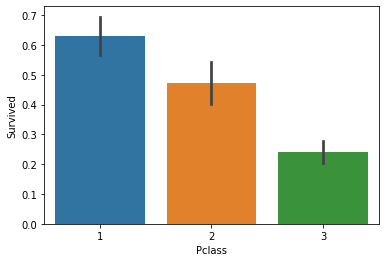

In [11]:
#plot the survival rate of each class
sns.barplot(x='Pclass', y='Survived',data=df)

In [12]:
#Look ata the survival rate by sex,age and class
Age=pd.cut(df['Age'],[0,18,80])
df.pivot_table('Survived', ['Sex',Age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

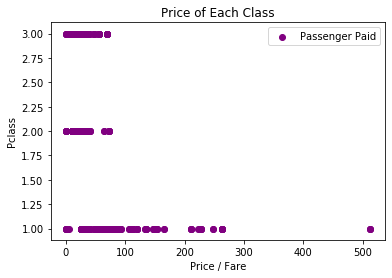

In [13]:
#plot the prices paid of each class
plt.scatter(df['Fare'],df['Pclass'],color='purple',label='Passenger Paid')
plt.ylabel('Pclass')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [14]:
 #count the empty values in each column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Look at all of the values in each column and get a count
for val in df:
    print(df[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Goodwin, Master. William Frederick    1
Sunderland, Mr. Victor Francis        1
Sagesser, Mlle. Emma                  1
Graham, Mr. George Edward             1
Ponesell, Mr. Martin                  1
                                     ..
Carlsson, Mr. August Sigfrid          1
Kassem, Mr. Fared                     1
Bing, Mr. Lee                         1
Gilnagh, Miss. Katherine "Katie"      1
Johansson, Mr. Karl Johan             1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8     

In [16]:
#remove the rows with missing values
df=df.dropna(subset=['Embarked','Age'])

In [17]:
#Look at the data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
#drop some columns
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [19]:
df.shape

#Look at the data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [20]:
#print the unique values in the columns before encoding
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Encode the sex column
df.iloc[:,2]=le.fit_transform(df.iloc[:,2].values)

#Encode the Embarked column
df.iloc[:,7]=le.fit_transform(df.iloc[:,7].values)

In [22]:
#print the unique values in the columns after encoding
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


In [23]:
#check the data types of columns
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [24]:
#split the data into independent 'X' and dependent 'Y' variables
X=df.iloc[:,1:8].values
Y=df.iloc[:,0].values

In [35]:
#split the dataset into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [36]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [54]:
#create a function with machine learning models
def models(X_train, Y_train):
    
    #use logistic regression
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,Y_train)
    
    #use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #use SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='linear',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #use Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    #use the RandomForestClassifier
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    #printing the training accuracy for each model
    print('[0]LogisticRegression Training Accuracy:',lr.score(X_train,Y_train))
    print('[1]K Neighbors Training Accuracy:',knn.score(X_train,Y_train))
    print('[2]SVC Linear Training Accuracy:',svc_lin.score(X_train,Y_train))
    print('[3]SVC RBF Training Accuracy:',svc_rbf.score(X_train,Y_train))
    print('[4]GaussianNB Training Accuracy:',gauss.score(X_train,Y_train))
    print('[5]DecisionTreeClassifier Training Accuracy:',tree.score(X_train,Y_train))
    print('[6]RandomForestClassifier Training Accuracy:',forest.score(X_train,Y_train))
    
    
    return lr,knn,svc_lin,svc_rbf,gauss,tree,forest

In [53]:
#Get and train all of the models
model=models(X_train,Y_train)

[0]LogisticRegression Training Accuracy: 0.7978910369068541
[1]K Neighbors Training Accuracy: 0.8664323374340949
[2]SVC Linear Training Accuracy: 0.7768014059753954
[3]SVC RBF Training Accuracy: 0.7768014059753954
[4]GaussianNB Training Accuracy: 0.8031634446397188
[5]DecisionTreeClassifier Training Accuracy: 0.9929701230228472
[6]RandomForestClassifier Training Accuracy: 0.9753954305799648


In [39]:
#show the confusion matrix and accuracy for all of hte models on the test data
for i in range(len(model)):
    cm=confusion_matrix(Y_test,model[i].predict(X_test))
    
    #Extract TN,FP,FN,TP
    TN,FP,FN,TP=confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
    
    test_score=(TP+TN)/(TP+TN+FN+FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy="{}"'.format(i,test_score))
    print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy="0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy="0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy="0.7902097902097902"

[[70 12]
 [18 43]]
Model[3] Testing Accuracy="0.7902097902097902"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy="0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy="0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy="0.8391608391608392"



In [44]:
#print the prediction of the logistic regression
y_pred=model[0].predict(X_test)
print(y_pred)

print()

#print the actual values
print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [50]:
#my_survival
#[pclass,sex,age,sibsp,parch,fare,Embarked]
my_survival=[[1,0,24,1,0,500,1]]

#scalling my_survival
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scaled=sc.fit_transform(my_survival)


#print prediction of my_survival using logistic regression
pred=model[6].predict(my_survival_scaled)
print(pred)


if pred==0:
    print("Oh No! You did't Survived!")
else:
    print("Nice! You Survived")

[0]
Oh No! You did't Survived!
